In [1]:
# load data
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import sys
import numpy as np
import matplotlib
import matplotlib
import matplotlib.lines as mlines

matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True
import matplotlib as mpl

mpl.style.use('classic')
mpl.rcParams['errorbar.capsize'] = 3
import warnings

warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 28})
from astropy.visualization import astropy_mpl_style
import copy
from matplotlib.colors import LogNorm

In [2]:
def rotate_via_numpy(x, y, radians):
    """Use numpy to build a rotation matrix and take the dot product."""
    #print (x)
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.dot(j, [x, y])
    #print (m.T[:,0])
    #print (m)
    return np.array(m.T[:,0]), np.array(m.T[:,1])

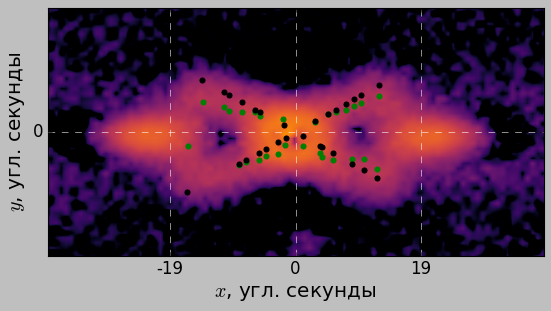

In [11]:
my_cmap = copy.copy(matplotlib.cm.get_cmap('inferno'))  # copy the default cmap
my_cmap.set_bad((0, 0, 0))
matplotlib.rcParams.update({'font.size': 18})
#vmin = 10 ** (-3)
#vmax = 3.0
image_file = "mass_b_1640_residual3.fits" #"x_only.fits"

image_data = fits.getdata(image_file, ext=0)
cut_x_left = 40
cut_x_right = 150
cut_y_bottom = 20
cut_y_up = 70 
plt.figure()
#plt.imshow(image_data[cut_y_bottom:cut_y_up, cut_x_left:cut_x_right], cmap=my_cmap, vmin=vmin, vmax=vmax, origin="lower", norm=LogNorm())
plt.imshow(image_data[:, cut_x_left:cut_x_right], 
           cmap=my_cmap, origin="lower", norm=LogNorm(vmin=0.003, vmax=3))

plt.grid(color='w', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
dir_list = ["mass_b_1640"] #["e04", "e06"]#, "e08"]
ell = [0.5] #[0.4, 0.6]#, 0.8]
axis_ratio = np.ones(len(ell)) - ell

signs_xy = ((1,1),(-1,1),(-1,-1),(1,-1),)
colors = ['g', 'b', 'purple']
x0 = 97.3 - cut_x_left
y0 = 47.4 #- cut_y_bottom
k_ideal = 0.581458 
ang = 1
j = 1
for j in range(0,1):
    dir = dir_list[j]
    data_angles = np.loadtxt(dir + "/" + "angles.dat")
    
    data_angles[:, 1:] = np.tan(data_angles[:, 1:]*np.pi/180)
    #print (data_angles)
    for i in range (1,5):
        x = data_angles[:,0]/np.sqrt(1 + data_angles[:,i]**2/axis_ratio[j]**2)
        y = data_angles[:,i]*x
        if j == 0:
            x_ideal = np.copy(x)
            y_ideal = x_ideal*k_ideal
        
        #print (axis_ratio[j],np.shape(x_ideal), np.shape(y_ideal))
        #print (np.shape(x_ideal), np.shape(y_ideal))
        x, y = rotate_via_numpy(x, y, np.pi/180.0*ang)
        if j == 0:
            x_ideal, y_ideal = rotate_via_numpy(x_ideal, y_ideal, np.pi/180.0*ang)
            x_ideal = x0 + signs_xy[i-1][0]*x_ideal
            y_ideal = y0 + signs_xy[i-1][1]*y_ideal
            
        x = x0 + signs_xy[i-1][0]*x
        y = y0 + signs_xy[i-1][1]*y    
        plt.scatter(x, y, color=colors[j])
        if j == 0:
            plt.scatter(x_ideal, y_ideal, color="k")
    j += 1

plt.plot()
desired_ticks = [-57, -38,-19, 0, 19, 38,57]
desired_ticks_labels = list(map(str, desired_ticks))
x_ticks = (x0+np.array(desired_ticks)/0.75)

desired_ticks_y = [-27, 0, 27]
desired_ticks_labels_y = list(map(str, desired_ticks_y))
y_ticks = (y0+np.array(desired_ticks_y)/0.75)
plt.xticks(np.array(x_ticks), desired_ticks_labels)
plt.yticks(np.array(y_ticks), desired_ticks_labels_y)
plt.xlabel("$x$, угл. секунды")#, fontsize=14)
plt.ylabel("$y$, угл. секунды")#, fontsize=14)
plt.gca().set_aspect("equal")
plt.xlim([-50+x0, 50+x0])
plt.ylim([-25+y0, 25+y0])
plt.savefig("Comp_with_Sav.jpg",
                transparent = False, dpi=300, bbox_inches='tight', pad_inches=0.05)

[[ 5.7   29.006 47.255 53.264 61.755 47.82  12.022]
 [ 9.8   29.556 25.86  52.179 40.494 37.022 10.273]
 [11.5   27.169 27.152 39.62  43.863 34.451  7.443]
 [13.6   24.578 21.714 37.903 37.301 30.374  7.302]
 [16.    24.918 18.429 32.518 26.709 25.644  5.024]
 [17.8   24.699 20.443 31.258 22.781 24.796  4.024]
 [22.5   24.402 18.763  8.278 25.394 19.209  6.799]]


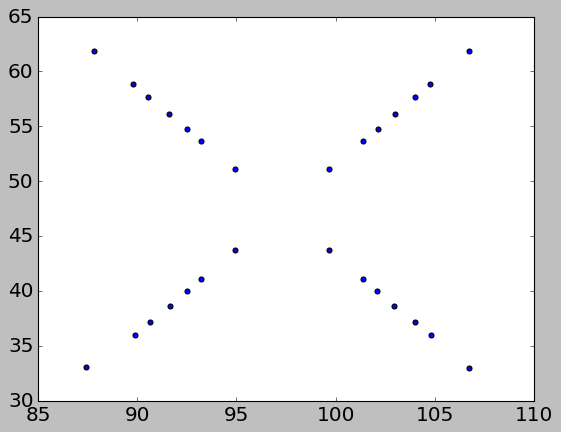

In [12]:
dir_list = ["mass_b_1640"] #["e04", "e06", "e08"]
ell = [0.5] #[0.4, 0.6, 0.8]
axis_ratio = np.ones(len(ell)) - ell
j = 0
signs_xy = ((1,1),(-1,1),(-1,-1),(1,-1),)
x0 = 97.3
y0 = 47.4
for dir in dir_list:
    
    data_angles = np.loadtxt(dir + "/" + "angles.dat")
    print (data_angles)
    data_angles[:, 1:] = np.arctan(data_angles[:, 1:])
    for i in range (1,5):
        x = data_angles[:,0]/np.sqrt(1 + data_angles[:,i]**2/axis_ratio[j])
        y = data_angles[:,i]*x
        x = x0 + signs_xy[i-1][0]*x
        y = y0 + signs_xy[i-1][1]*y
        plt.scatter(x, y)
    j += 1

In [13]:
plt.savefig(sys.argv[2] + "_model.png", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>